In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm

In [7]:
x=[1,5,1.5,8,1,9]
y=[2,8,1.8,8,0.6,11]

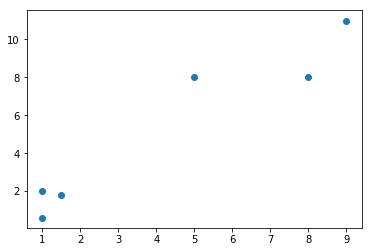

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
x = np.array([[1,2],
            [5,8],
            [1.5,1.8],
            [8,8],
            [1,0.6],
            [9,11]])
y=[0,1,0,1,0,1]
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
k = np.array([[0.58,0.7]])
k.reshape(-1,1)
print(clf.predict(k))

[0]


In [11]:
k = np.array([[10.58,10.7]])
k.reshape(-1,1)
print(clf.predict(k))

[1]


[0.1380943  0.24462418]


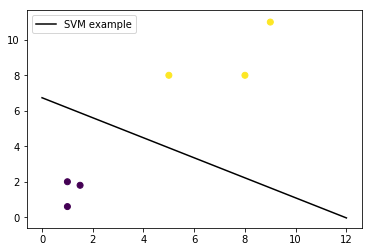

In [12]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx,yy,'k-',label='SVM example')

plt.scatter(x[:,0],x[:,1], c =y)
plt.legend()
plt.show()

In [13]:
import pandas as pd
bankdata = pd.read_csv('bill_authentication.csv')

In [14]:
bankdata.shape

(1372, 5)

In [15]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
x = bankdata.drop('Class', axis =1)
y = bankdata['Class']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20)

In [18]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = svclassifier.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[158   3]
 [  1 113]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       161
           1       0.97      0.99      0.98       114

   micro avg       0.99      0.99      0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [21]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris))
print(iris.feature_names)


['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


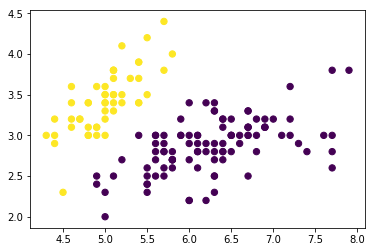

In [26]:
x,y =iris.data, iris.target
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(x)
labels = gmm.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis');

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20)


In [28]:
svclassifier = SVC(kernel = 'linear', C =100)
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)

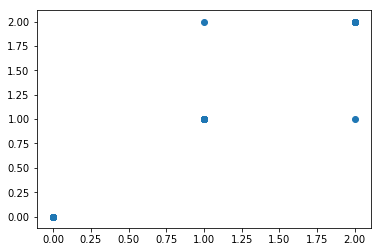

In [29]:
plot = plt.scatter(y_test,y_pred)

In [30]:
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test,y_pred))
#print(roc_auc_score(y-test,y_pred))

[[12  0  0]
 [ 0  9  1]
 [ 0  1  7]]


In [31]:
from sklearn.model_selection import RepeatedKFold
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(x):
    print("%s %s" % (train, test))

[  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33  34  36  37  38  40  42  45  46  49  50  51  53  56  59  60  62
  63  68  69  73  74  75  78  80  84  86  87  88  89  91  95  96  97  98
  99 100 102 103 104 105 112 115 116 120 126 129 135 138 139 141 142 143
 144 145 147] [  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149]
[  0   1   3   6  10  11  17  21  22  23  24  25  26  32  35  39  41  43
  44  47  48  52  54  55  57  58  61  64  65  66  67  70  71  72  76  77
  79  81  82  83  85  90  92  93  94 101 106 107 108 109 110 111 113 114
 117 118 119 121 122 123 124 125 127 128 130 131 132 133 134 136 137 140
 146 148 149] [  2   4   5   7   8   9  12  13  14  15  16  18  19  20  27  28  29  30
  31  33 

In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train, test in loo.split(x):
    print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

C:\Users\Javed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


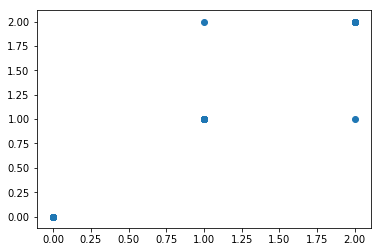

In [33]:
%matplotlib inline
svclassifier = SVC(kernel = 'rbf', C =1)
svclassifier.fit(x_train,y_train)
y_pred = svclassifier.predict(x_test)
plot = plt.scatter(y_test,y_pred)